In [48]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from scipy import stats # type: ignore
import os



In [ ]:
# Load the CSV file
file_path = 'benin-malanville.csv'  
data = pd.read_csv(file_path)

# Calculate summary statistics
summary_statistics = data.describe()

# Display the summary statistics
print("Summary Statistics:\n", summary_statistics)



Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

In [55]:
#Data quality check
# Check for missing values
missing_values = data.isnull().sum()
# Display missing values count
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Comments    525600
dtype: int64


In [51]:
# Check for negative values in specific columns
negative_entries = {
    'GHI': data[data['GHI'] < 0],
    'DNI': data[data['DNI'] < 0],
    'DHI': data[data['DHI'] < 0],
    'ModA': data[data['ModA'] < 0],
    'ModB': data[data['ModB'] < 0],
    'WS': data[data['WS'] < 0],
    'WSgust': data[data['WSgust'] < 0]
}

# Display negative entries
for column, entries in negative_entries.items():
    if not entries.empty:
        print(f"\nNegative values in {column}:\n", entries)


Negative values in GHI:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstd

In [52]:
# Detecting outliers using IQR method for sensor readings and wind speed data
def detect_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Checking for outliers
outliers = {
    'ModA': detect_outliers_iqr(data['ModA']),
    'ModB': detect_outliers_iqr(data['ModB']),
    'WS': detect_outliers_iqr(data['WS']),
    'WSgust': detect_outliers_iqr(data['WSgust'])
}

# Display outliers
for column, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"\nOutliers in {column}:\n", outlier_values)


Outliers in ModA:
 671       1210.3
674       1281.5
676       1267.3
850       1218.0
5019      1271.0
           ...  
514922    1182.0
517777    1163.0
520659    1168.0
522074    1166.0
522075    1191.0
Name: ModA, Length: 98, dtype: float64

Outliers in ModB:
 671       1210.3
674       1281.5
676       1267.3
849       1155.0
850       1217.0
           ...  
522024    1133.0
522046    1128.0
522067    1133.0
522074    1153.0
522075    1179.0
Name: ModB, Length: 240, dtype: float64

Outliers in WS:
 2209      6.4
2879      6.9
2950      6.6
2957      6.4
2958      7.9
         ... 
525151    7.3
525152    6.3
525155    6.9
525156    6.5
525159    6.3
Name: WS, Length: 6717, dtype: float64

Outliers in WSgust:
 2876      8.4
2879      8.4
2950      8.4
2957      8.7
2958      9.4
         ... 
525143    8.9
525150    8.4
525151    8.7
525155    8.9
525159    8.4
Name: WSgust, Length: 5368, dtype: float64


C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_4220\1432952908.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Tesfaye\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


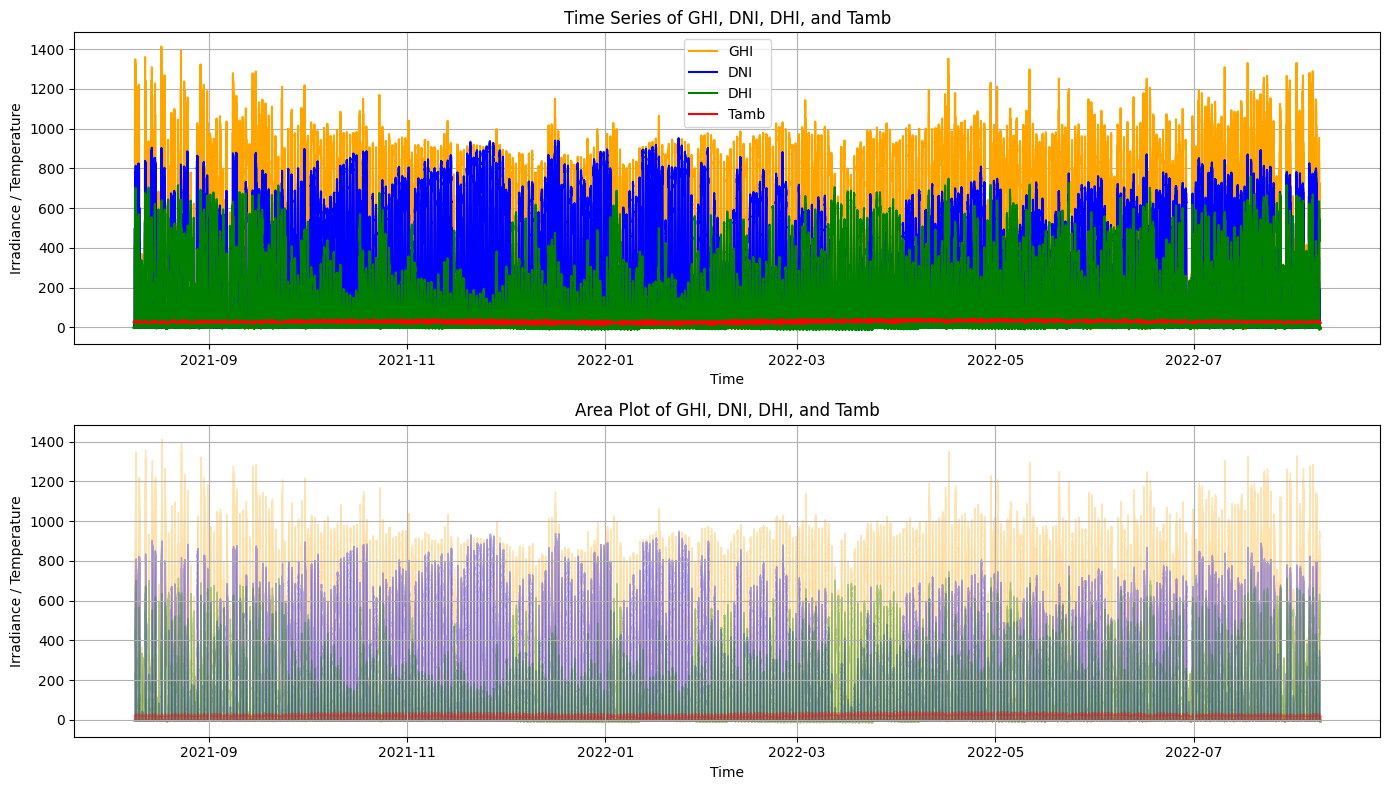

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

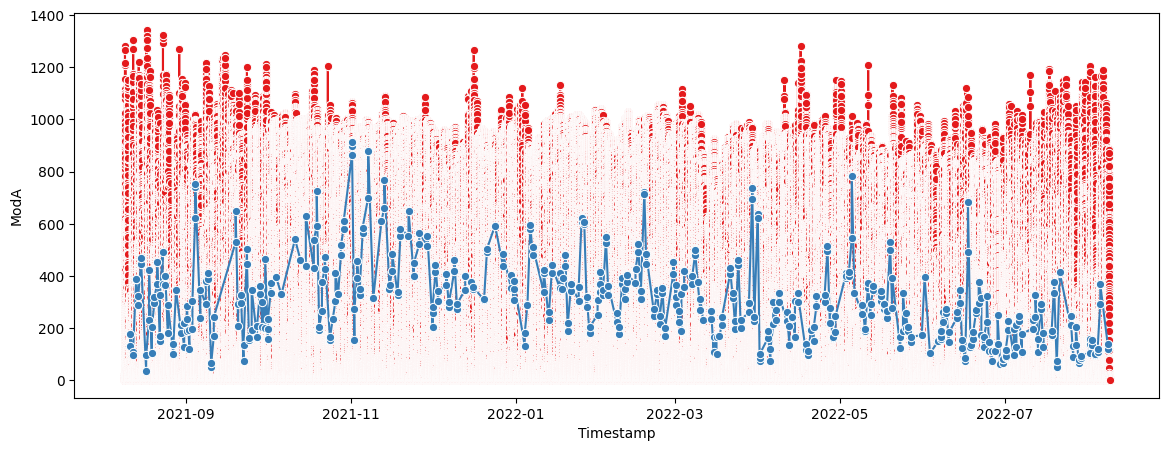

In [53]:
# Time Series Analysis
# Convert the Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as the index
data.set_index('Timestamp', inplace=True)

# Plot time series data for relevant variables
plt.figure(figsize=(14, 8))

# Line plots
plt.subplot(2, 1, 1)
plt.plot(data.index, data['GHI'], label='GHI', color='orange')
plt.plot(data.index, data['DNI'], label='DNI', color='blue')
plt.plot(data.index, data['DHI'], label='DHI', color='green')
plt.plot(data.index, data['Tamb'], label='Tamb', color='red')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Time')
plt.ylabel('Irradiance / Temperature')
plt.legend()
plt.grid()

# Area plots
plt.subplot(2, 1, 2)
plt.fill_between(data.index, data['GHI'], color='orange', alpha=0.3)
plt.fill_between(data.index, data['DNI'], color='blue', alpha=0.3)
plt.fill_between(data.index, data['DHI'], color='green', alpha=0.3)
plt.fill_between(data.index, data['Tamb'], color='red', alpha=0.3)
plt.title('Area Plot of GHI, DNI, DHI, and Tamb')
plt.xlabel('Time')
plt.ylabel('Irradiance / Temperature')
plt.grid()

plt.tight_layout()
plt.show()

# Step 5: Evaluate the impact of Cleaning
plt.figure(figsize=(14, 5))
sns.lineplot(data=data, x=data.index, y='ModA', hue='Cleaning', palette='Set1', marker='o', label='ModA')
sns.lineplot(data=data, x=data.index, y='ModB', hue='Cleaning', palette='Set2', marker='x', label='ModB')
plt.title('Sensor Readings Over Time with Cleaning Status')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend()
plt.grid()
plt.show()



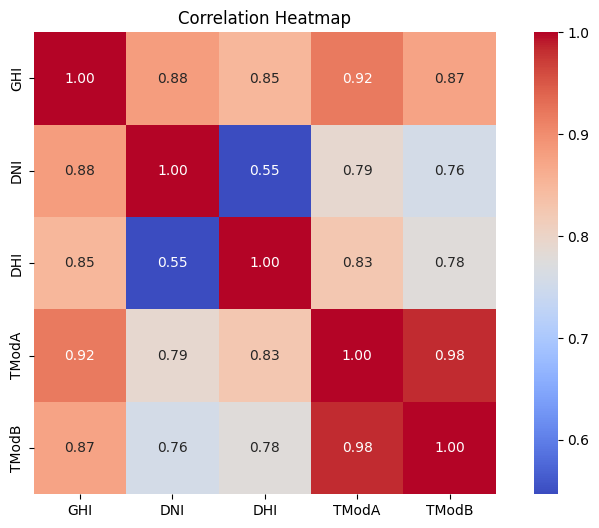

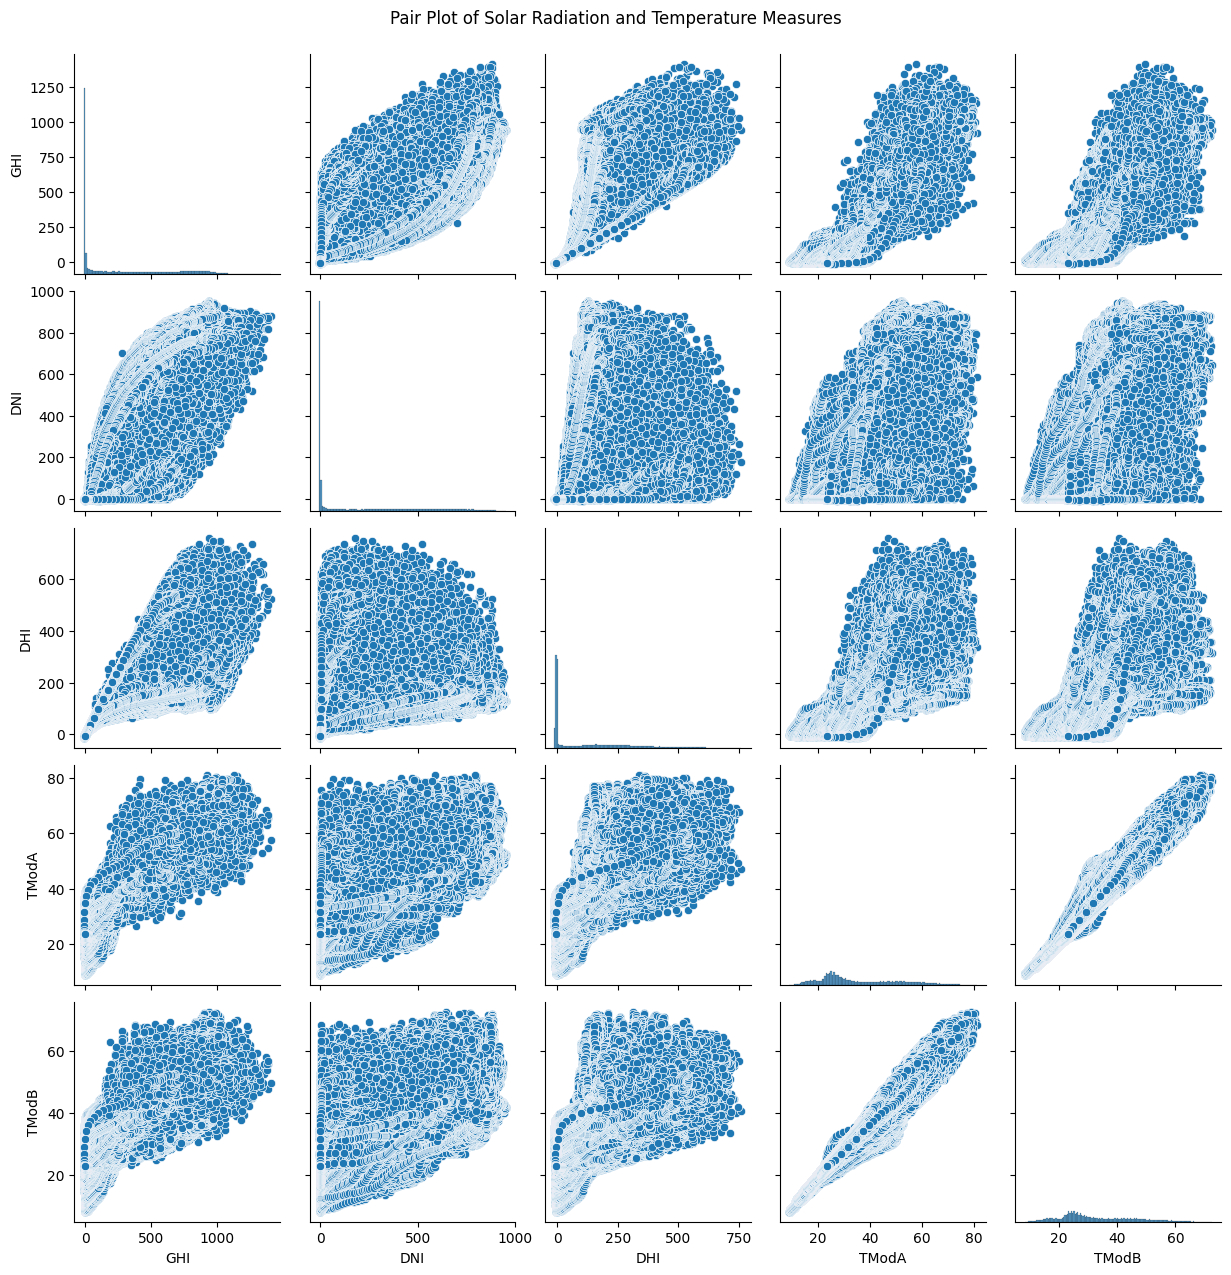

KeyboardInterrupt: 

In [54]:
# Calculate Correlation Matrix
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = data[correlation_columns].corr()

# Visualize Correlations with Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot for Correlation Exploration
sns.pairplot(data[correlation_columns])
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

# Investigate Wind Conditions with Scatter Matrix
wind_columns = ['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']
scatter_matrix = sns.pairplot(data[wind_columns], markers='o', hue='GHI', palette='viridis')
plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

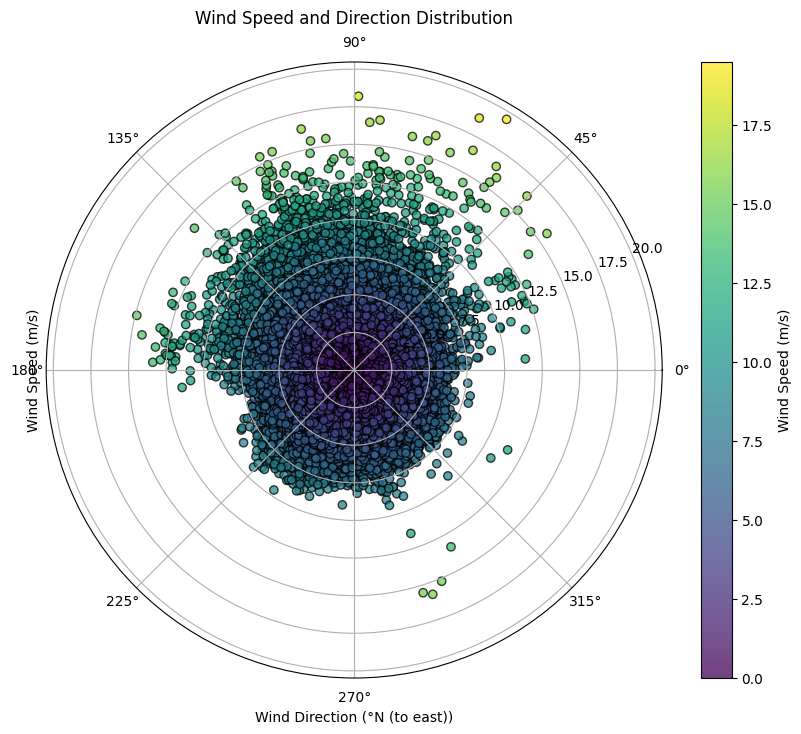

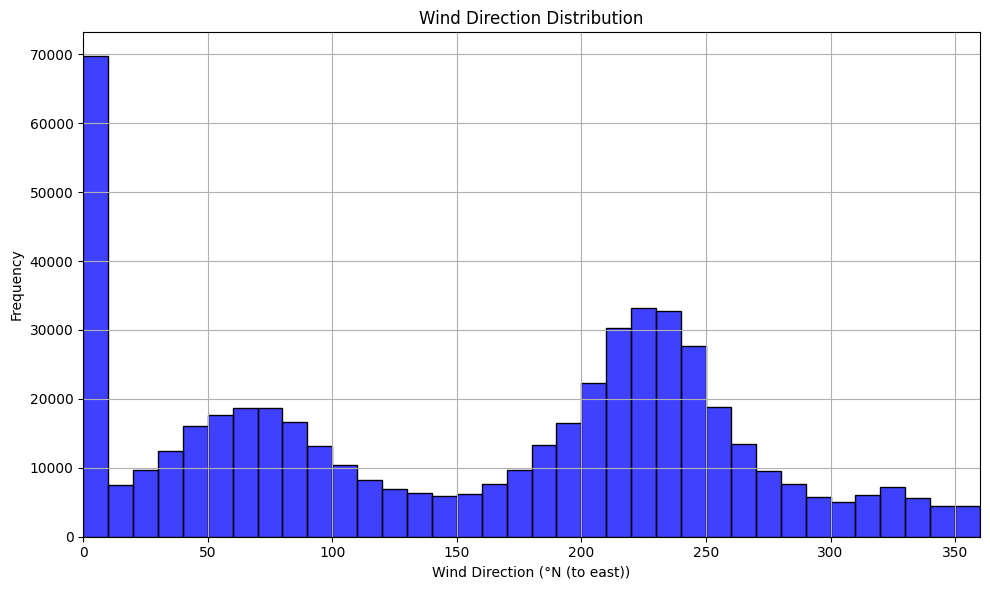

In [56]:
#Wind Analysis

wind_speed = data['WS']  
wind_direction = data['WD'] 

#Create Polar Plot for Wind Direction and Speed
plt.figure(figsize=(10, 8))

# Create a polar subplot
ax = plt.subplot(111, polar=True)

# Convert wind direction from degrees to radians
wind_direction_rad = np.deg2rad(wind_direction)

# Create a scatter plot
sc = ax.scatter(wind_direction_rad, wind_speed, c=wind_speed, cmap='viridis', alpha=0.75, edgecolors='k')

# Add color bar
plt.colorbar(sc, label='Wind Speed (m/s)')

# Set plot title and labels
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_xlabel('Wind Direction (°N (to east))')
ax.set_ylabel('Wind Speed (m/s)')

# Step 6: Analyze Wind Direction Variability
plt.figure(figsize=(10, 6))
sns.histplot(wind_direction, bins=36, kde=False, color='blue', edgecolor='k')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N (to east))')
plt.ylabel('Frequency')
plt.xlim(0, 360)
plt.grid()

plt.tight_layout()
plt.show()

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_4220\1095767031.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Tesfaye\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


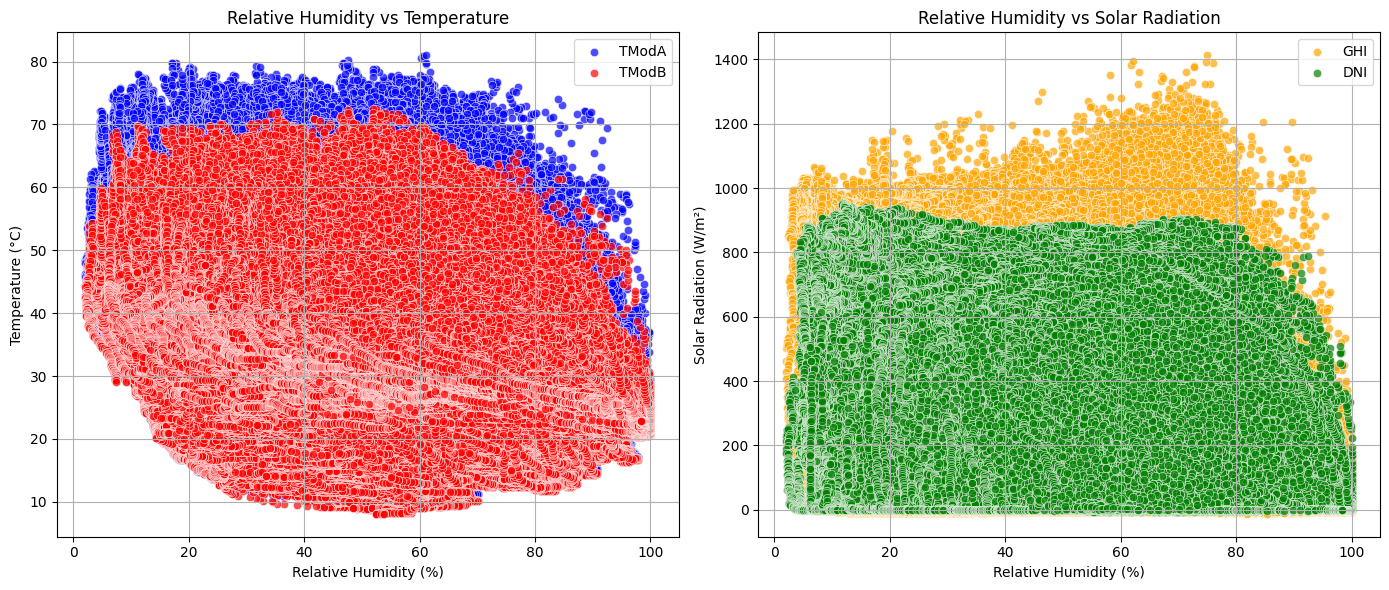

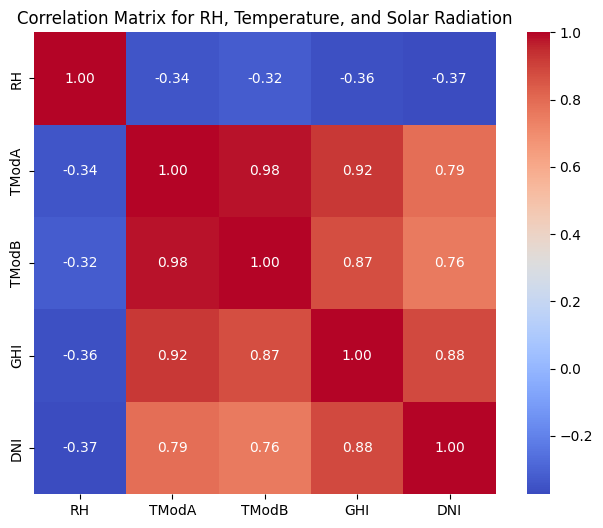

In [57]:
# Temperature Analysis
plt.figure(figsize=(14, 6))

# Scatter plot for RH vs Temperature
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='RH', y='TModA', color='blue', label='TModA', alpha=0.7)
sns.scatterplot(data=data, x='RH', y='TModB', color='red', label='TModB', alpha=0.7)
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()

# Scatter plot for RH vs Solar Radiation
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='RH', y='GHI', color='orange', label='GHI', alpha=0.7)
sns.scatterplot(data=data, x='RH', y='DNI', color='green', label='DNI', alpha=0.7)
plt.title('Relative Humidity vs Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#Correlation Analysis
correlation_data = data[['RH', 'TModA', 'TModB', 'GHI', 'DNI']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix for RH, Temperature, and Solar Radiation')
plt.show()

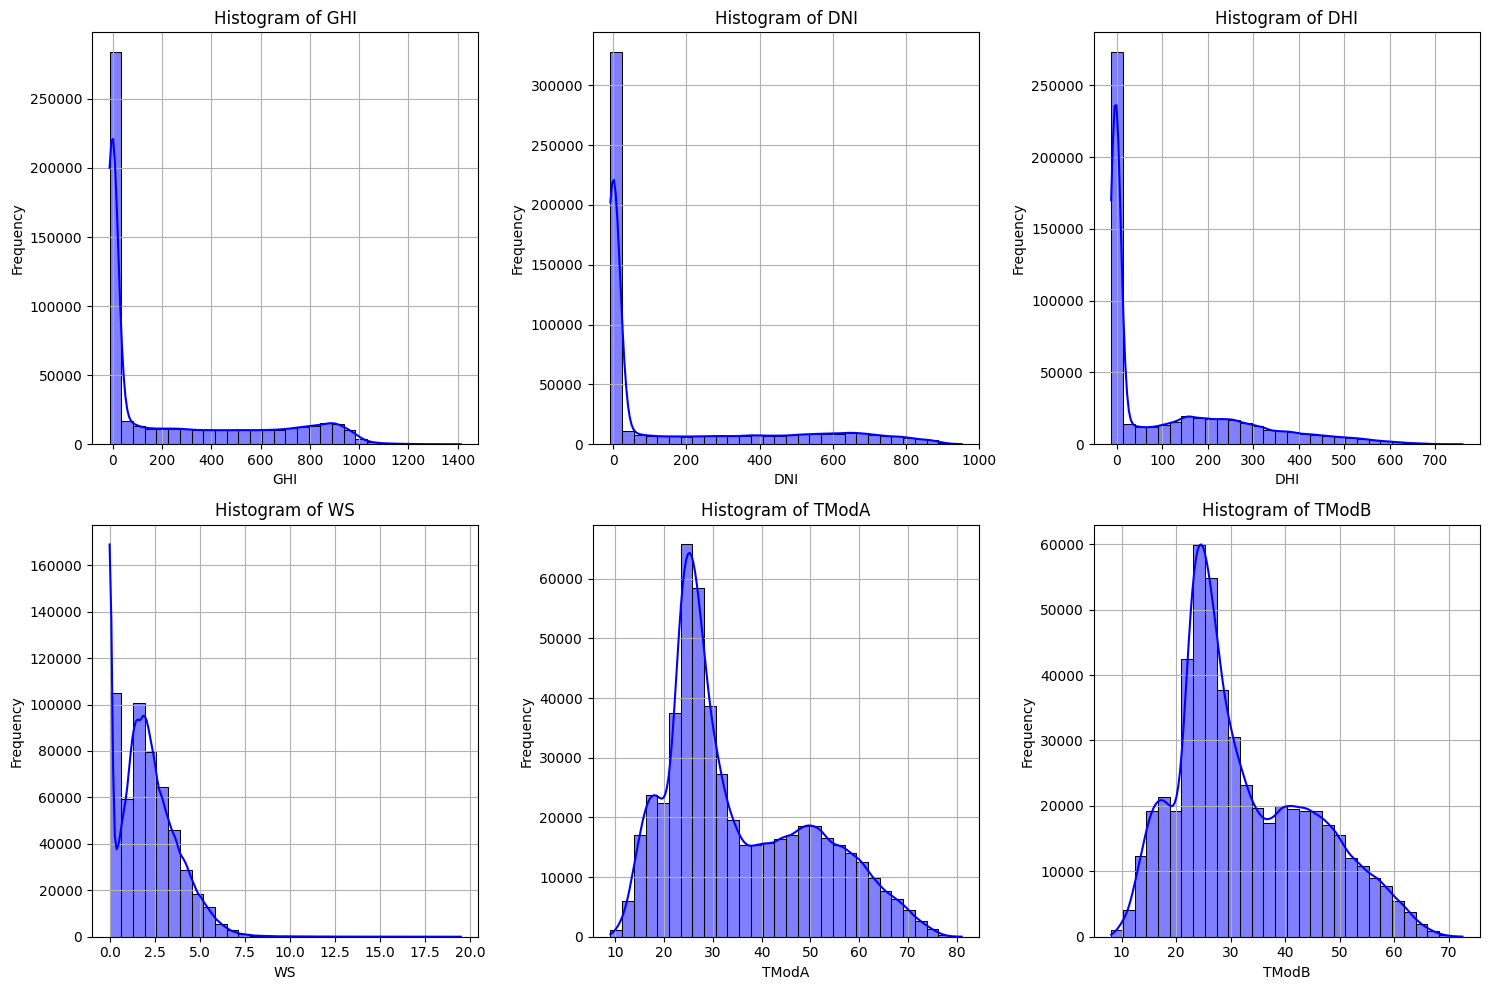

In [58]:
#Create Histograms
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']  # Add or remove variables as needed

plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid
    sns.histplot(data[variable], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid()

plt.tight_layout()
plt.show()

In [59]:
# Calculate Z-scores
# Specify the columns for which you want to calculate Z-scores
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']  # Adjust as necessary

# Calculate Z-scores
z_scores = (data[variables] - data[variables].mean()) / data[variables].std()

#  Flag Outliers
threshold = 3  # Common threshold for Z-scores
outliers = (z_scores.abs() > threshold)

# Adding outlier flag to the original DataFrame
for variable in variables:
    data[f'{variable}_outlier'] = outliers[variable]

# Display results
outlier_summary = data[[*variables, *[f'{var}_outlier' for var in variables]]]
print(outlier_summary.head())

                     GHI  DNI  DHI   WS  TModA  TModB  GHI_outlier  \
Timestamp                                                            
2021-08-09 00:01:00 -1.2 -0.2 -1.1  0.0   26.3   26.2        False   
2021-08-09 00:02:00 -1.1 -0.2 -1.1  0.0   26.3   26.2        False   
2021-08-09 00:03:00 -1.1 -0.2 -1.1  0.3   26.4   26.2        False   
2021-08-09 00:04:00 -1.1 -0.1 -1.0  0.2   26.4   26.3        False   
2021-08-09 00:05:00 -1.0 -0.1 -1.0  0.1   26.4   26.3        False   

                     DNI_outlier  DHI_outlier  WS_outlier  TModA_outlier  \
Timestamp                                                                  
2021-08-09 00:01:00        False        False       False          False   
2021-08-09 00:02:00        False        False       False          False   
2021-08-09 00:03:00        False        False       False          False   
2021-08-09 00:04:00        False        False       False          False   
2021-08-09 00:05:00        False        False       F

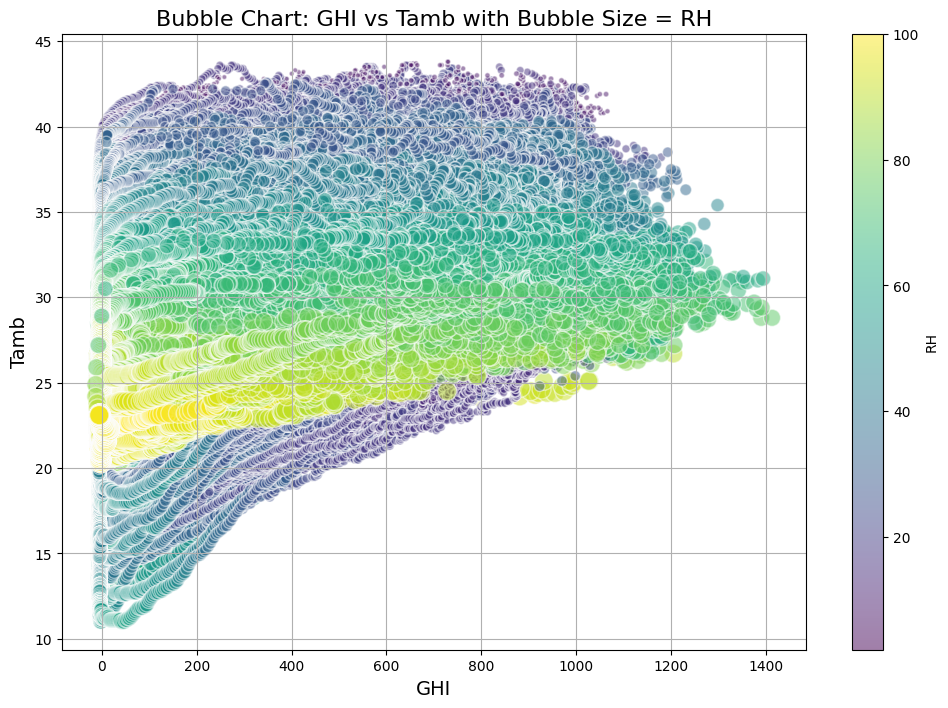

In [60]:
#Create a Bubble Chart
plt.figure(figsize=(12, 8))

# Define the variables
x = 'GHI'  # X-axis variable
y = 'Tamb'  # Y-axis variable
size = 'RH'  # Bubble size variable (can also use 'BP' for Barometric Pressure)

# Create the bubble chart
scatter = plt.scatter(data[x], data[y], 
                      s=data[size] * 2,  # Scale bubble size (adjust multiplier as needed)
                      alpha=0.5, 
                      c=data[size], 
                      cmap='viridis', 
                      edgecolors='w')

# Add titles and labels
plt.title(f'Bubble Chart: {x} vs {y} with Bubble Size = {size}', fontsize=16)
plt.xlabel(x, fontsize=14)
plt.ylabel(y, fontsize=14)

# Add a color bar
plt.colorbar(scatter, label=size)

plt.grid()
plt.show()

In [61]:
# Clean the Data

#Drop columns that are entirely null
columns_to_drop = data.columns[data.isnull().all()]
data.drop(columns=columns_to_drop, inplace=True)

#Handling missing values for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)  # Fill with mean

#Handling missing values for object columns (e.g., Comments)
object_columns = data.select_dtypes(include=['object']).columns
for column in object_columns:
    data[column].fillna('No Comment', inplace=True)  # Replace with a default value

#Addressing anomalies (Example: Replace negative values in columns that shouldn't have them)
# Adjust the column names as necessary
data.loc[data['GHI'] < 0, 'GHI'] = 0  # Example for GHI
data.loc[data['DNI'] < 0, 'DNI'] = 0  # Example for DNI
data.loc[data['Tamb'] < -30, 'Tamb'] = None  # Example for Tamb, replace unrealistic values

# Verify cleaning
print(data.info())  # Check data types and non-null counts after cleaning
print(data.head())  # Display the first few rows of the cleaned data

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_4220\2846446360.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)  # Fill with mean


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64
